<a href="https://colab.research.google.com/github/yuntacc/AI-2021/blob/main/%E3%80%8C%E3%80%8CColab101_MNIST%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome!! 歡迎加入人工智慧暨網站系統應用專業人才設計專班. 

讓我們好好來瞭解體驗與學習人工智慧與深度學習等相關的知識與應用! 

如果有任何學習上的問題都歡迎可以留言或是寫信給我們助教喔! 

助教的e-mail address是ta2021.vnu@gmail.com

Prepared by Horace Chen, Date: October 2021




Keras: Keras 是一個開源專案，透過 Python 實做的深度學習高階 API 函式庫。

https://blog.toright.com/posts/6809/keras-machine-learning-mnist.html



# MNIST
## Text book: Chapter 2 MLP, MNIST, Overfitting, DropOut

In [ ]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show() 

def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

## 步驟 1. 資料集準備 

In [ ]:
#建立訓練資料和測試資料，包括訓練特徵集、訓練標籤和測試特徵集、測試標籤	

(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()

#show_image(train_feature[0]) 
#show_images_labels_predictions(train_feature,train_label,[],0,10)    


#將 Features 特徵值換為 784個 float 數字的 1 維向量

train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

#Features 特徵值標準化

train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#label 轉換為 One-Hot Encoding 編碼

train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)


## 步驟 2. 建模訓練 / 訓練 

In [ ]:
#建立模型
model = Sequential()
#輸入層：784, 隱藏層：256，輸出層：10

model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [ ]:
#定義訓練方式

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
#以(train_feature_normalize,train_label_onehot)資料訓練，
#訓練資料保留 20% 作驗證,訓練10次、每批次讀取200筆資料，顯示簡易訓練過程
train_history =model.fit(x=train_feature_normalize,
                         y=train_label_onehot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 4s - loss: 0.4311 - accuracy: 0.8867 - val_loss: 0.2236 - val_accuracy: 0.9377
Epoch 2/10
240/240 - 1s - loss: 0.1903 - accuracy: 0.9455 - val_loss: 0.1574 - val_accuracy: 0.9564
Epoch 3/10
240/240 - 1s - loss: 0.1372 - accuracy: 0.9605 - val_loss: 0.1345 - val_accuracy: 0.9615
Epoch 4/10
240/240 - 1s - loss: 0.1067 - accuracy: 0.9699 - val_loss: 0.1150 - val_accuracy: 0.9660
Epoch 5/10
240/240 - 1s - loss: 0.0845 - accuracy: 0.9764 - val_loss: 0.1118 - val_accuracy: 0.9664
Epoch 6/10
240/240 - 1s - loss: 0.0701 - accuracy: 0.9807 - val_loss: 0.0969 - val_accuracy: 0.9707
Epoch 7/10
240/240 - 1s - loss: 0.0586 - accuracy: 0.9837 - val_loss: 0.0921 - val_accuracy: 0.9718
Epoch 8/10
240/240 - 1s - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.0878 - val_accuracy: 0.9726
Epoch 9/10
240/240 - 1s - loss: 0.0403 - accuracy: 0.9892 - val_loss: 0.0851 - val_accuracy: 0.9753
Epoch 10/10
240/240 - 1s - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.0848 - val_accuracy: 0.9755

In [ ]:
#評估準確率

scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9772

準確率= 0.9771999716758728


## 步驟 3. 預測未知 / 預測 

In [ ]:
#預測

#prediction=model.predict_classes(test_feature_normalize)
prediction=model.predict(test_feature_normalize)
prediction=np.argmax(prediction,axis=1)



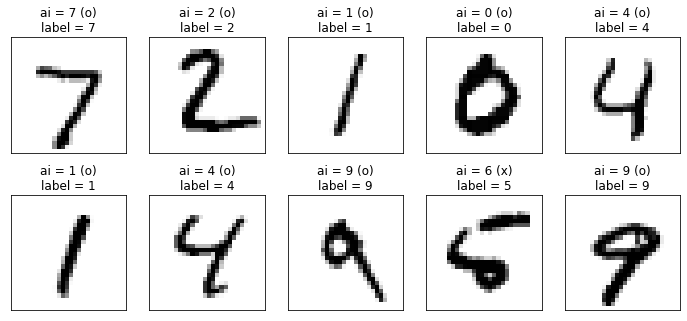

In [ ]:
#顯示圖像、預測值、真實值 

show_images_labels_predictions(test_feature,test_label,prediction,0)

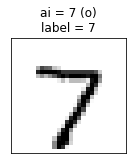

In [ ]:
show_images_labels_predictions(test_feature,test_label,prediction,0, 1)

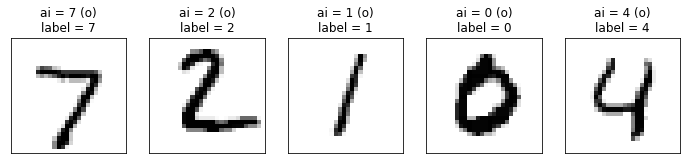

In [ ]:
show_images_labels_predictions(test_feature,test_label,prediction,0, 5)